# PART A

## 1. Data Understanding:

In [1271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### 1.A Read all the 3 CSV files as DataFrame and store them into 3 separate variables

In [1272]:
#Read all the 3 CSV files as DataFrame and store them into 3 separate variables
dfNormal = pd.read_csv("Normal.csv")
dfTypeH= pd.read_csv("Type_H.csv")
dfTypeS= pd.read_csv("Type_S.csv")

### 1.B Print Shape and columns of all the 3 DataFrames

In [1273]:
dfNormal.shape

(100, 7)

In [1274]:
dfTypeH.shape

(60, 7)

In [1275]:
dfTypeS.shape

(150, 7)

### 1. C Compare Column names of all the 3 DataFrames and clearly write observations

In [1276]:
dfNormal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [1277]:
dfTypeH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [1278]:
dfTypeS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


<b>observation</b>
All the three dataframes have the same column Names and all the columns are of the same datatype across the three frames.

### 1.D Print DataTypes of all the 3 DataFrames.

In [1279]:
#Print DataTypes of all the 3 DataFrames.
print('--------Normal-------')
print(dfNormal.dtypes)
print('\n--------TypeH-------')
print(dfTypeH.dtypes)
print('\n--------TypeS-------')
print(dfTypeS.dtypes)

--------Normal-------
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

--------TypeH-------
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

--------TypeS-------
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


### 1.E Observe and share variation in ‘Class’ feature of all the 3 DataFrames.

In [1280]:
def percentage(part, whole):
    return 100 * float(part)/float(whole)

In [1281]:
dfNormal["Class"].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [1282]:
print(f'{percentage(dfNormal[dfNormal["Class"]=="Nrmal"].shape[0], dfNormal.shape[0])}% of data that is misspelled for Dataset of Normal Patients')

27.0% of data that is misspelled for Dataset of Normal Patients


In [1283]:
dfTypeH["Class"].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [1284]:
print(f'{percentage(dfTypeH[dfTypeH["Class"]=="type_h"].shape[0], dfTypeH.shape[0])}% of data that is i a different case for Dataset of TypeH Patients')


38.333333333333336% of data that is i a different case for Dataset of TypeH Patients


In [1285]:
dfTypeS["Class"].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

In [1286]:
print(f'{percentage(dfTypeS[dfTypeS["Class"]=="tp_s"].shape[0], dfTypeS.shape[0])}% of data that is misspelled for Dataset of TypeS Patients')


11.333333333333334% of data that is misspelled for Dataset of TypeS Patients


## 2 Data Preparation and Exploration:

### 2A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. 

In [1287]:
dfNormal["Class"]="Normal"
dfTypeH["Class"]="type_h"
dfTypeS["Class"]="type_s"

In [1288]:
dfNormal["Class"].value_counts()

Normal    100
Name: Class, dtype: int64

In [1289]:
dfTypeH["Class"].value_counts()

type_h    60
Name: Class, dtype: int64

In [1290]:
dfTypeS["Class"].value_counts()

type_s    150
Name: Class, dtype: int64

### 2B. Combine all the 3 DataFrames to form a single DataFrame

Checkpoint: Expected Output shape = (310,7)

In [1291]:
frames = [dfNormal, dfTypeH,dfTypeS]
df = pd.concat(frames)
display(df)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,type_s
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,type_s
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,type_s
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,type_s


In [1292]:
df.shape
#There are 31 rows and 7 columns in the final dataframe

(310, 7)

In [1293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


### 2C. Print 5 random samples of this DataFrame

In [1294]:
for i in range(5):
    dfSample= df.sample(n=10)
    print('-'*30 + f'Sample-{i+1}'  + '-'*30)
    
    print(dfSample.head())

------------------------------Sample-1------------------------------
    P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
47    78.425951  33.425951  76.277439  45.000000  138.554111  77.155172   
24    37.731992   9.386298  42.000000  28.345694  135.740926  13.683047   
44    77.409333  29.396545  63.232302  48.012788  118.450731  93.563737   
54    41.171680  17.321206  33.469403  23.850474  116.377889  -9.569250   
92    63.404481  14.115327  48.136806  49.289153  111.916008  31.784495   

     Class  
47  type_s  
24  Normal  
44  type_s  
54  type_h  
92  type_s  
------------------------------Sample-2------------------------------
     P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
16     63.834982  20.362507  54.552434  43.472475  112.309491  -0.622527   
110    64.809541  15.174078  58.839994  49.635463  111.679961  21.407198   
69     48.801909  18.017762  52.000000  30.784147  139.150407  10.442862   
135    71.241764   5.268270  

### 2D Print Feature-wise percentage of Null values

In [1295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [1297]:
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

### 2E. Check 5-point summary of the new DataFrame. 

In [895]:
df.describe().loc[['min', '25%', '50%', '75%', 'max']].transpose() 

#S_Degree has very high variance and there is a lot of difference betwee Q3 (41) and max(418) - there are a lot of outliers
#Scale of P_tilt is smaller than other columns and needs to be scaled
#P_tilt 75 % of values are less than 22 but maximum value is 49 so there might be little right skewness 

,min,25%,50%,75%,max
P_incidence,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,-11.058179,1.603727,11.767934,41.287352,418.543082


## 3. Data Analysis:

### 3A. Visualize a heatmap to understand correlation between all features

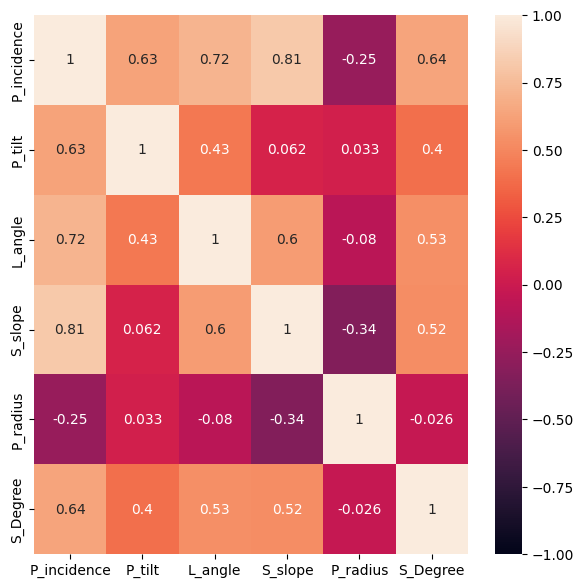

In [896]:
numeric_columns=['P_incidence', 'P_tilt', 'L_angle' , 'S_slope' ,'P_radius' , 'S_Degree']
plt.figure(figsize=(7,7))
sns.heatmap(data=df[numeric_columns].corr(numeric_only=True), annot=True,  vmin=-1, vmax=1);

## 3b. Share insights on correlation

<b>A. Features having stronger correlation with correlation value.</b>

1. P_Incidence and S_Slope (0.81)
2. P_Incidence and L_angle (0.72)
3. P_Incidence and S_Degree (0.64)
4. P_Incidence and P_Tilt (0.63)
5. L_angle and S_Slope  (0.6)
6. L_angle and S_Degree (0.53)                        
7. S_Slope and S_Degree (0.52)
8. P_Tilt and L_Angle (0.43)
9. P_Tilt and S_Degree (0.4)

<b>B. Features having weaker correlation with correlation value</b>
1. S_Slope and P_Radius (-0.34)
2. P_Incidence and P_Radius (-0.25)
3. L_angle and P_radius (-0.08)
4. P_Radius and S_Degree(-0.026)

#### Checking the variance of the independent features. (fatures with very less or almost 0 variance can be dropped as they will have noimpact on the classification

In [897]:
# Compute variance of each variable.
df.var()

#Observation: all the featires have high variance and have an impact on the classification. S_Degree has the highest variance

P_incidence     297.097633
P_tilt          100.166675
L_angle         344.253290
S_slope         180.179672
P_radius        177.352531
S_Degree       1410.680476
dtype: float64

### 3C. Visualize a pairplot with 3 classes distinguished by colors and share insights



<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x2000 with 0 Axes>

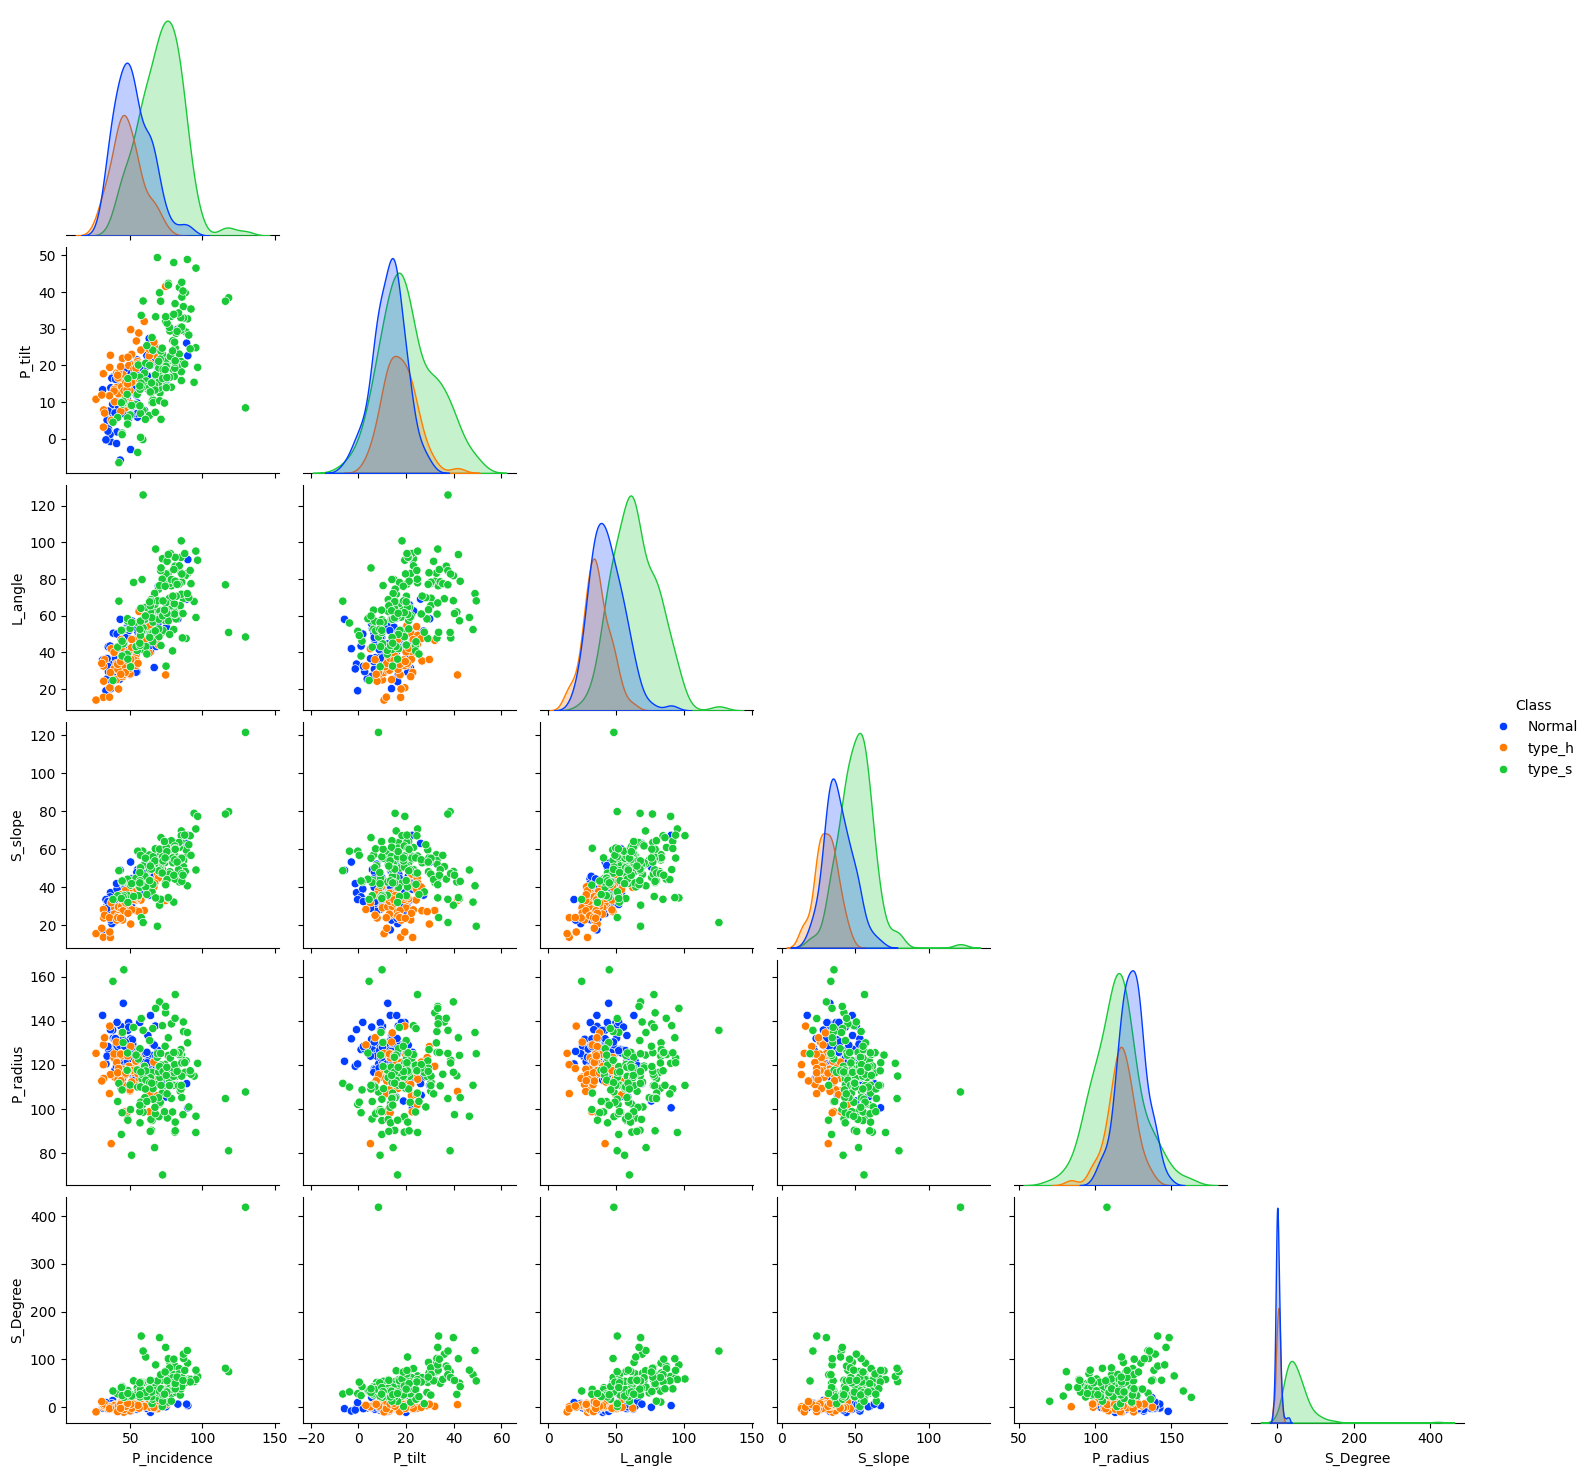

In [898]:
plt.figure(figsize=(20,20))

sns.pairplot(data=df, vars=numeric_columns, corner=True, hue='Class', palette= 'bright')
             
plt.show
             

<b>Observations:</b>

1. All normal cases have lower P_Tilt, L_Angel, S_Slope, and ~0 S_Degree 
2. Variation of P_tilt is lesser for  Type_H (0-30) than Type_S (-ve to 50)
3. L_Angle is lesser (and have lots of overlaps with Normal) and is more Type_S
4. S_Slope is lesser (and have lots of overlaps with Normal) and is more Type_S
5. Variation of P_radius is lesser for  Type_H (110-140) than Type_S (80-150) - there are lots of overlaps between Normal and type_h cases for P_Radius values
6. S_Degree is ~0 for type-h but has larger variation of type_s (20-150) 


### 3D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.


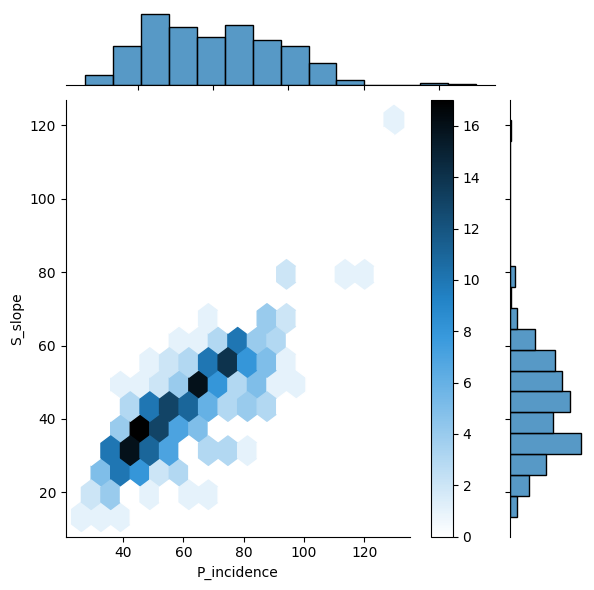

In [899]:
sns.jointplot(data=df, x='P_incidence', y='S_slope', kind="hex");
plt.colorbar();

1. There is a strong positive corelation between P_incidence and S_Slope
2. Both P_Incidence have almost normal distribution with a bit of left skew
3. S_Slope data have normal distribution with a bit of flat spread in center.

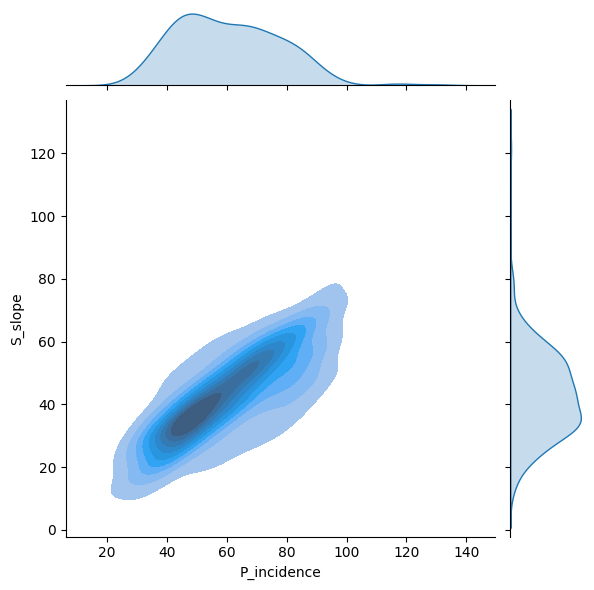

In [900]:
sns.jointplot(data=df, x='P_incidence', y='S_slope', kind="kde", fill=True);

### 3E. Visualize a boxplot to check distribution of the features and share insights

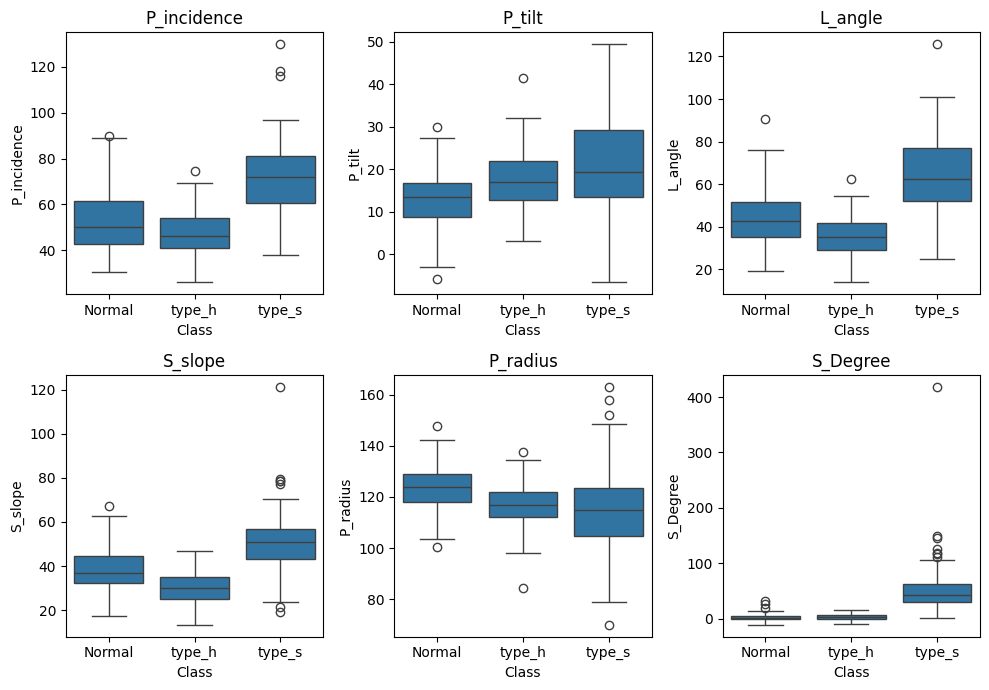

In [901]:
plt.figure(figsize=(10, 7))

for i, variable in enumerate(numeric_columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=df , y=variable , x='Class',whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

<b>Observations</b>

<b>P_Incidence</b> 

values : Type_H<Normal<Type_S 

mean :
~70 for type_s 
~45 for type_h 
~50 for type_s

Outliers:
There are outliers for all all three calsses, Type_S has 4-5 outliers and the other two have only 1 outlier

<b>P_tilt</b>
value : Type_H<Normal<Type_S 

mean: almost the same for all the three classes
15 for Normal
20 for ype_H
20 for type_S

Outliers:
There are outliers for all Normal and type_h classes. Type_S has no outliers

<b>L_Angle</b> 
Values: Type_H<Normal<Type_S 

mean: 
40 for Normal
35 for type_H
60 for type_S

Outliers:
There are 1 outliers for each of the three classes

<b>S_slope</b>
Values: Type_H<Normal<Type_S 

mean:  
40 for Normal
30 for type_H
50 for type_S

Outliers:
There are outliers for all Normal and type_s classes
For Type_S there is an extreme outlier (120 and then the next max is 80)


<b>P_radius</b> Only this feature the values are in reverse order with respect to the three classes than all the other features
Values: Type_H>Normal>Type_S 

mean: almost the same for all the three classes
120 for Normal
110 for type_H
110 for type_S

Outliers:
There are outliers for all the three classes


<b>S_Degree</b> has large values for Type_S Class and very small spread for other two classes
Values: Type_H>Normal>Type_S 

mean: almost the same for all the three classes
~0 for Normal
~0 for type_H
~50 for type_S

Outliers:
There are outliers for Normal and Type_S classes. There is an one value of S_Degree which is extremely high then the others - almost double of the next max value (>400 and the next max is <200)




## 4 Model Building:

### Other Data CleanUp tasks requried for KNN classification

#### convert target variable to categorical and encode

In [1302]:
# Use label encoder to convert the target categorical variables to one-hot encoding 
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()

df['Class']= class_label_encoder.fit_transform(df['Class'])

In [1303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 18.2 KB


In [1304]:
df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0


In [1305]:
df['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

#### Scale the data (For KNN the data should be on the same scale)

In [1306]:
df.head(10)
#Data is not on the same scale, we will use Robust scaler for 
#P_Radius, P_incidence ,P_tilt ,L_angle ,S_slope to bring them to same scale

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
5,30.741938,13.354966,35.903526,17.386972,142.410107,-2.005373,0
6,50.913101,6.677000,30.896522,44.236102,118.151531,-1.057986,0
7,38.126589,6.557617,50.445075,31.568971,132.114805,6.338199,0
8,51.624672,15.969344,35.000000,35.655328,129.385308,1.009228,0
9,64.311867,26.328369,50.958964,37.983498,106.177751,3.118221,0


In [1307]:
#Robust scaler has been used because there are a lot of outliers in all the features and therefore Standard and Min-Max scalars cannot be used
from sklearn.preprocessing import RobustScaler
#columns to scale
cols_toScale=['P_radius', 'P_incidence' ,'P_tilt' ,'L_angle' ,'S_slope','S_Degree']

robustScaler1 = RobustScaler()
#scaling using robust scaler
roubustScaledOutput = pd.DataFrame(robustScaler1.fit_transform(df[cols_toScale]),columns=cols_toScale,index=df.index)
roubustScaledOutput.head()

#merging back the class columns with scaled data
dfScaledRobust=pd.concat([roubustScaledOutput, df['Class']],axis=1)
dfScaledRobust.head()

,P_radius,P_incidence,P_tilt,L_angle,S_slope,S_Degree,Class
0,0.634530,-0.763242,0.052964,-0.555753,-1.078308,-0.095285,0
1,0.513499,-0.142554,0.227946,0.078425,-0.333483,-0.246104,0
2,0.742116,-0.541775,-0.647170,-0.102319,-0.361153,-0.170694,0
3,0.725829,-0.392179,0.095556,-0.060092,-0.596322,-0.319499,0
4,0.807003,-0.491135,-0.497483,-0.268637,-0.380540,-0.381942,0


In [911]:
dfScaledRobust.shape

(310, 7)

In [1308]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report #precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

### 4 A. Split X and y

In [913]:
XRobust = dfScaledRobust.drop(labels= "Class" , axis = 1)
yRobust = dfScaledRobust["Class"]

### 4 B. Split data into train and test with 80:20 proportion

In [914]:
XRobust_train, XRobust_test, yRobust_train, yRobust_test = train_test_split(XRobust, yRobust, test_size=0.20, random_state=1)

### 4 C. Train a Supervised Learning Classification base model using KNN classifier.

In [926]:
#Using the default value of K (5)
NNHRobustScaled = KNeighborsClassifier()

NNHRobustScaled.fit(XRobust_train, yRobust_train)
y_pred_Robust = NNHRobustScaled.predict(XRobust_test)

### 4 D. Print all the possible performance metrics for both train and test data.

In [961]:
NNHRobustScaled.score(XRobust_test, yRobust_test)

#print('The accuracy score and Classification Report for Robust Scaled data with is (defaults)\n')
#print('The model accuracy on test data is :' ,accuracy_score(yRobust_test, y_pred_Robust),'\n')
#print(classification_report(yRobust_test, y_pred_Robust))


# Calculate performance metrics
accuracy_org = accuracy_score(yRobust_test, y_pred_Robust)
precision_org = precision_score(yRobust_test, y_pred_Robust,average='weighted')
recall_org = recall_score(yRobust_test, y_pred_Robust,average='weighted')
f1_org = f1_score(yRobust_test, y_pred_Robust,average='weighted')

# Print the performance metrics
print(f"Accuracy: {accuracy_org:.4f}")
print(f"Precision: {precision_org:.4f}")
print(f"Recall: {recall_org:.4f}")
print(f"F1 Score: {f1_org:.4f}")

print('------------------')
print(classification_report(yRobust_test, y_pred_Robust))


Accuracy: 0.7258
Precision: 0.7401
Recall: 0.7258
F1 Score: 0.7309
------------------
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        18
           1       0.64      0.64      0.64        11
           2       0.87      0.79      0.83        33

    accuracy                           0.73        62
   macro avg       0.69      0.70      0.69        62
weighted avg       0.74      0.73      0.73        62



## 5 Performance Improvement

### 5 A. Experiment with various parameters to improve performance of the base model
(Optional: Experiment with various Hyperparameters - Research required)

<b>There are 2 HyperParameters for KNN - Value of K and the distance metrics</b>

In [943]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [947]:
from sklearn.model_selection import GridSearchCV 
#from sklearn.model_selection import RandomizedSearchCV

estimator_KNN = KNeighborsClassifier()
parameters_KNN = {
    'n_neighbors': neighbors, #[1, 3, 5, 7, 8, 9, 11, 13, 15,17,19,21],#,23,25,27, 29,31,33,35,37,39,41,43, 45,47, 49, 51],
    'leaf_size': [20,30,40,50],
    'p': [1,2],
    'weights': ('uniform', 'distance'),
    'metric': ('euclidean', 'minkowski', 'chebyshev'),
    'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')
}
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

In [956]:
grid_search_KNN.fit(XRobust_train, yRobust_train)


print(grid_search_KNN.best_params_ ) 
#Mean cross-validated score of the best_estimator
print('Best Score - KNN: Robust Scaled', grid_search_KNN.best_score_ )

# Predict using the best model
best_model = grid_search_KNN.best_estimator_
y_pred = best_model.predict(XRobust_test)

# Evaluate the best model on the test set
test_accuracy = best_model.score(XRobust_test, yRobust_test)
print("Test Accuracy of Best Model:", test_accuracy)

# Calculate performance metrics
accuracy = accuracy_score(yRobust_test, y_pred)
precision = precision_score(yRobust_test, y_pred,average='weighted')
recall = recall_score(yRobust_test, y_pred,average='weighted')
f1 = f1_score(yRobust_test, y_pred,average='weighted')

print('\n---------------------------------------\n')
# Print the performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print('------------------')
print(classification_report(yRobust_test, y_pred))

{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'chebyshev', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Best Score - KNN: Robust Scaled 0.8305306122448979
Test Accuracy of Best Model: 0.7903225806451613

---------------------------------------

Accuracy: 0.7903
Precision: 0.7880
Recall: 0.7903
F1 Score: 0.7889
------------------
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        18
           1       0.73      0.73      0.73        11
           2       0.85      0.88      0.87        33

    accuracy                           0.79        62
   macro avg       0.76      0.76      0.76        62
weighted avg       0.79      0.79      0.79        62



### 5 B. Clearly showcase improvement in performance achieved. [1 Marks]
For Example:
A. Accuracy: +15% improvement
B. Precision: +10% improvement.

In [960]:
#before
#Accuracy: 0.7258
#Precision: 0.7401
#Recall: 0.7258
#F1 Score: 0.7309

#After
#Accuracy: 0.7903
#Precision: 0.7880
#Recall: 0.7903
#F1 Score: 0.7889

#Improvemet in Accuracy 
print(f'{percentage(0.7903-0.7258, 0.7258)}% improvement in accuracy')
print(f'{percentage(0.7880-0.7401, 0.7401)}% improvement in Precision')
print(f'{percentage(0.7903-0.7258, 0.7258)}% improvement in Recall')
print(f'{percentage(0.7889-0.7309, 0.7309)}% improvement in F1 Score')


8.886745659961422% improvement in accuracy
6.472098365085807% improvement in Precision
8.886745659961422% improvement in Recall
7.935422082364216% improvement in F1 Score


### 5 C. Clearly state which parameters contributed most to improve model performance. [1 Marks]

Using Metrics as chebyshev and K value of 11 are both contributing to the performance improvement
when K is changes from 11 to 5 or metrics is being changed from chebyshev to minkowski, the perfomance metrics are reducing by .4.

In [967]:
#{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
#Best Score - KNN: Robust Scaled 0.8348333333333334

NNHEvaluated = KNeighborsClassifier(n_neighbors = 11, weights= 'distance', metric='chebyshev')

NNHEvaluated.fit(XRobust_train, yRobust_train)
y_pred = NNHEvaluated.predict(XRobust_test)
NNHEvaluated.score(XRobust_test, y_pred)

#print('The model accuracy on test data is :' ,accuracy_score(yRobust_test, y_pred),'\n')

# Calculate performance metrics
accuracy = accuracy_score(yRobust_test, y_pred)
precision = precision_score(yRobust_test, y_pred,average='weighted')
recall = recall_score(yRobust_test, y_pred,average='weighted')
f1 = f1_score(yRobust_test, y_pred,average='weighted')

# Print the performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print('------------------')
print(classification_report(yRobust_test, y_pred))

Accuracy: 0.7903
Precision: 0.7880
Recall: 0.7903
F1 Score: 0.7889
------------------
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        18
           1       0.73      0.73      0.73        11
           2       0.85      0.88      0.87        33

    accuracy                           0.79        62
   macro avg       0.76      0.76      0.76        62
weighted avg       0.79      0.79      0.79        62



# Part B

## 1 Data Understanding and Preparation:

### 1. A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

In [1170]:
datab1= pd.read_csv("Data1.csv")
datab2= pd.read_csv("Data2.csv")

### 1. B. Print shape and Column Names and DataTypes of both the Dataframes. 

In [1171]:
datab1.shape

(5000, 8)

In [1172]:
datab2.shape

(5000, 7)

In [1173]:
print(datab1.columns)

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')


In [1174]:
print(datab2.columns)

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')


In [1175]:
datab1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [1176]:
datab2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [1177]:
datab1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [1178]:
datab2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


### 1. C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]

In [1235]:
datab= pd.merge(datab1,datab2,on="ID")

In [1236]:
datab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [1237]:
datab.shape

(5000, 14)

In [1238]:
#checking for duplicates
duplicates = datab.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))
datab[duplicates]

#there no duplicate rows in the data

Number of duplicate rows = 0


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard


### 1. D. Change Datatype of below features to ‘Object’ [1 Marks]
‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.
[Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.]

In [1239]:
cols_cat=['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
for col in cols_cat:
    print('\n--------' + col + '--------')
    print(datab[col].value_counts())
    
#There are no special characters in the categorical columns


--------CreditCard--------
0    3530
1    1470
Name: CreditCard, dtype: int64

--------InternetBanking--------
1    2984
0    2016
Name: InternetBanking, dtype: int64

--------FixedDepositAccount--------
0    4698
1     302
Name: FixedDepositAccount, dtype: int64

--------Security--------
0    4478
1     522
Name: Security, dtype: int64

--------Level--------
1    2096
3    1501
2    1403
Name: Level, dtype: int64

--------HiddenScore--------
1    1472
2    1296
4    1222
3    1010
Name: HiddenScore, dtype: int64


In [1240]:
#converting to category type
cols_cat=['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
for col in cols_cat:
    datab[col] = datab[col].astype('category')
    print('\n--------' + col + '--------')
    print(datab[col].value_counts())


--------CreditCard--------
0    3530
1    1470
Name: CreditCard, dtype: int64

--------InternetBanking--------
1    2984
0    2016
Name: InternetBanking, dtype: int64

--------FixedDepositAccount--------
0    4698
1     302
Name: FixedDepositAccount, dtype: int64

--------Security--------
0    4478
1     522
Name: Security, dtype: int64

--------Level--------
1    2096
3    1501
2    1403
Name: Level, dtype: int64

--------HiddenScore--------
1    1472
2    1296
4    1222
3    1010
Name: HiddenScore, dtype: int64


In [1241]:
datab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   float64 
dtypes: category(6), float64(2), int64(6)
memory usage: 381.7 KB


In [1242]:
#dropping id and ZipCode columns
datab.drop ('ID', axis=1, inplace=True)
datab.drop ('ZipCode', axis=1, inplace=True)

### Checking for Nulls

In [1243]:
datab.isnull().sum()
#there are 20 null values in LoanOnCard column

Age                     0
CustomerSince           0
HighestSpend            0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

Observation: there are 20 row out of 5000 that have null values in LoanOnCard

In [1244]:
datab['LoanOnCard'].unique()

array([nan,  1.,  0.])

In [1245]:
#replacing the nulls with the Mode value which is 0
datab['LoanOnCard']=datab['LoanOnCard'].fillna(0)

In [1246]:
datab['LoanOnCard'].value_counts()

0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64

In [1247]:
datab.isnull().sum()
#all the null values of LoanOnCard have been fixed

Age                    0
CustomerSince          0
HighestSpend           0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

## 2. Data Exploration and Analysis: 

### 2.A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.

<Axes: ylabel='LoanOnCard'>

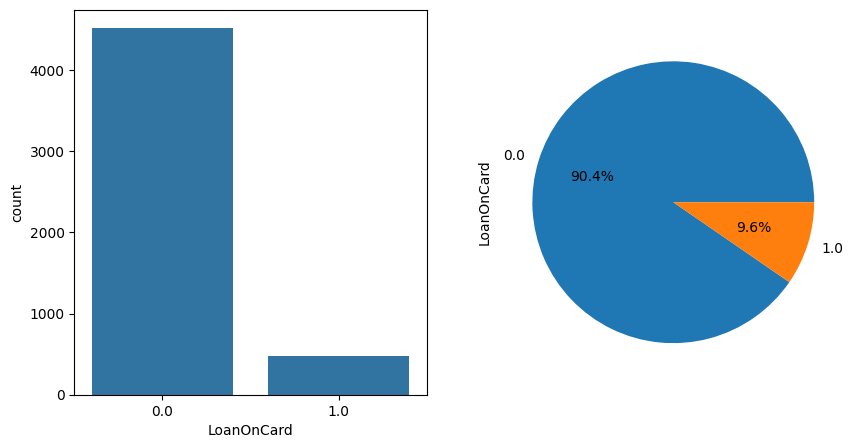

In [1192]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes = axes.flatten()
plt.subplot(1, 2, 1)
sns.countplot(data=datab, x='LoanOnCard')
plt.subplot(1, 2, 2)
datab['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%') 

Data is highly imbalanced with 4500 customer who have not taken loan and only 500 records of customers who have take loan
(90.4% is Loan not taken and 

<Axes: >

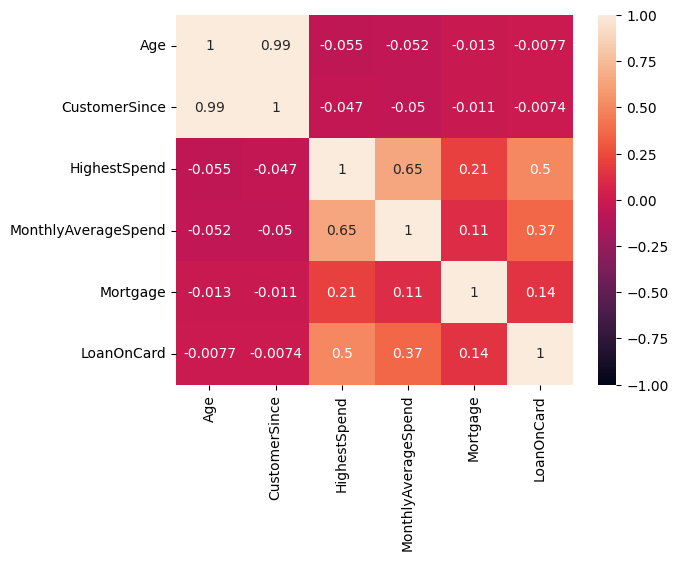

In [1193]:
sns.heatmap(data=datab.corr(numeric_only=True), annot=True, vmin=-1, vmax=1)

People with Highest spends have greatest Monthy AverageSpends.

Also HighestSpend have +ve corelation person taking LoanOnCard and have higher possibility of taking Mortgage.

### Univariant Analysis

For Numeric Variables

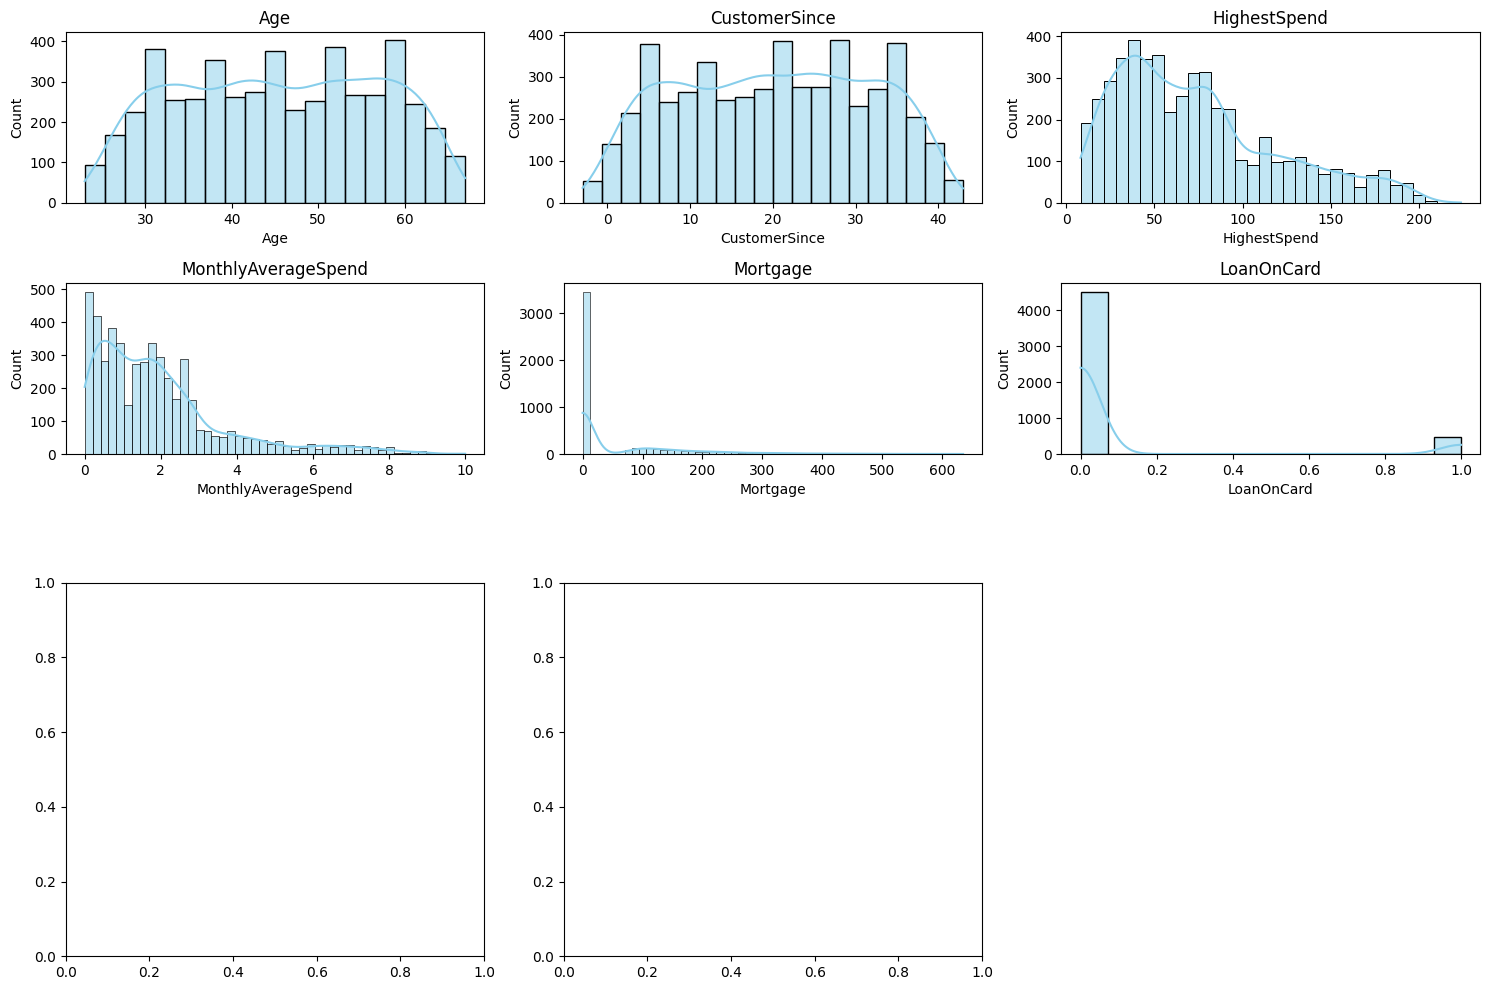

In [1194]:
numeric_datab = datab.select_dtypes(include=['float64', 'int64'])

# Determine the number of rows and columns for subplots
num_cols = numeric_datab.shape[1]
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # To have 3 columns in each row

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_datab.columns):
    ax = axes[i]    
    plt.subplot(num_rows*2, 3, i+1)
    sns.histplot(data=datab , x=datab[col],  kde=True, color='skyblue', edgecolor='black' )     
    plt.title(col)
    
# Hide empty subplots if there are any
for i in range(len(numeric_data.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

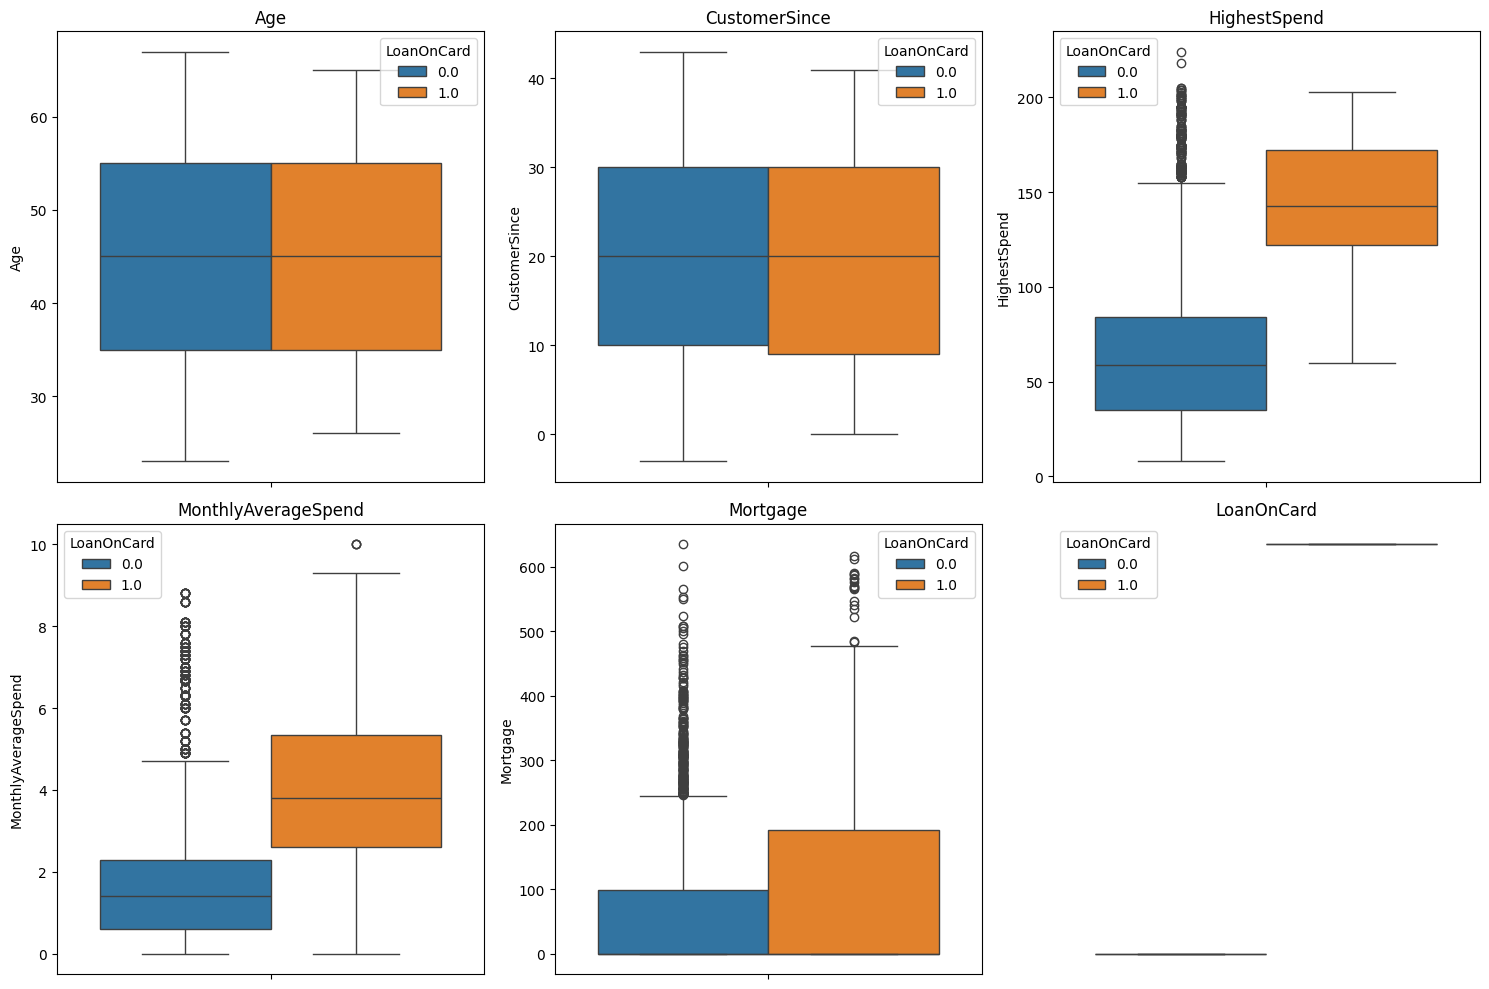

In [1195]:
numeric_datab = datab.select_dtypes(include=['float64', 'int64'])
 

fig, axes = plt.subplots(2, 3, figsize=(15, 5 * 2))
axes = axes.flatten()

for i, col in enumerate(numeric_datab.columns):
    ax = axes[i]    
    plt.subplot(num_rows, 3, i+1)
    sns.boxplot(data=datab , y=datab[col] , hue='LoanOnCard')     
    plt.title(col)
    
# Hide empty subplots if there are any
for i in range(len(numeric_data.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

<b>Age</b> 
Most of the customers are between age group 35 to 55. Age does seem to have an impact on whether a customer will take and loan or not.

<b>Customer Since </b> 
Customer have been with bank from 10 years to 30 years. CustomerTenure does not seems to have an impact whether he will take or not take a loan.

<b>HighestSpend</b> 
HighestSpend data is right skewed (between 45 to 175). Customer who have not take loan have many outliers. Highspend customers are most likey to take a loan. There are lots of outliers. 

<b>Monthly Average Spend</b>
Monthly Average Spend data is right scewed (lies bewteen 1 and 5). Customer who have not taken loan have many outliers in MonthlyAverageSpends. 
Customer with higher monthly spends are most likely to take a loan, 
There are lots of outliers.

<b>Mortgage</b>
Very few customers have taken mortgage from the bank (<200). However customer with Mortgage are more likely to take a loanOnCard. There are lots of outliers.
 

### For Categorical Variables

In [1196]:
categorical_datab = datab.select_dtypes(include=['object'])
num_rows=4
num_cols= 3
#fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,5))
#axes = axes.flatten()
 
 
plt.figure(figsize=(10, 10))
for i, col in enumerate(categorical_datab.columns):
    ax = axes[i]
    plt.subplot(num_rows, num_cols, i+1)
    datab[col].value_counts().plot.pie(autopct='%1.1f%%')    
     

# Hide empty subplots if there are any
#for i in range(len(categorical_datab.columns), len(axes)):
 #   axes[i].axis('off')

plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

<b>Hidden Score</b> 
There are 4 HiddenScore categories (1,2,3,4).
Data is almost equally distributed across all the hiddenScore classes

<b>Level</b> 
There are 3 Level categories (1,2,3).
Data is almost fairly equally distributed across all the categories

<b>Security</b> 
Security data is binary - 0,1
Data is highly imbalanced only 10.4% of Customers have security asset with the bank

<b>FixedDepositsAccount</b> 
FixedDeposits is binary data - (0,1).
Only 6% of the customers have fixed deposit account with the bank

<b>InternetBanking</b> 
Binary data - 0,1
Data is almost fairly equally distributed. 59.7% of customers use internet banking

<b>CreditCard</b> 
Binary data - 0,1
only 29.4% of customers use CreditCard

### Bivariant Analysis

#### Numerical Data 

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x2000 with 0 Axes>

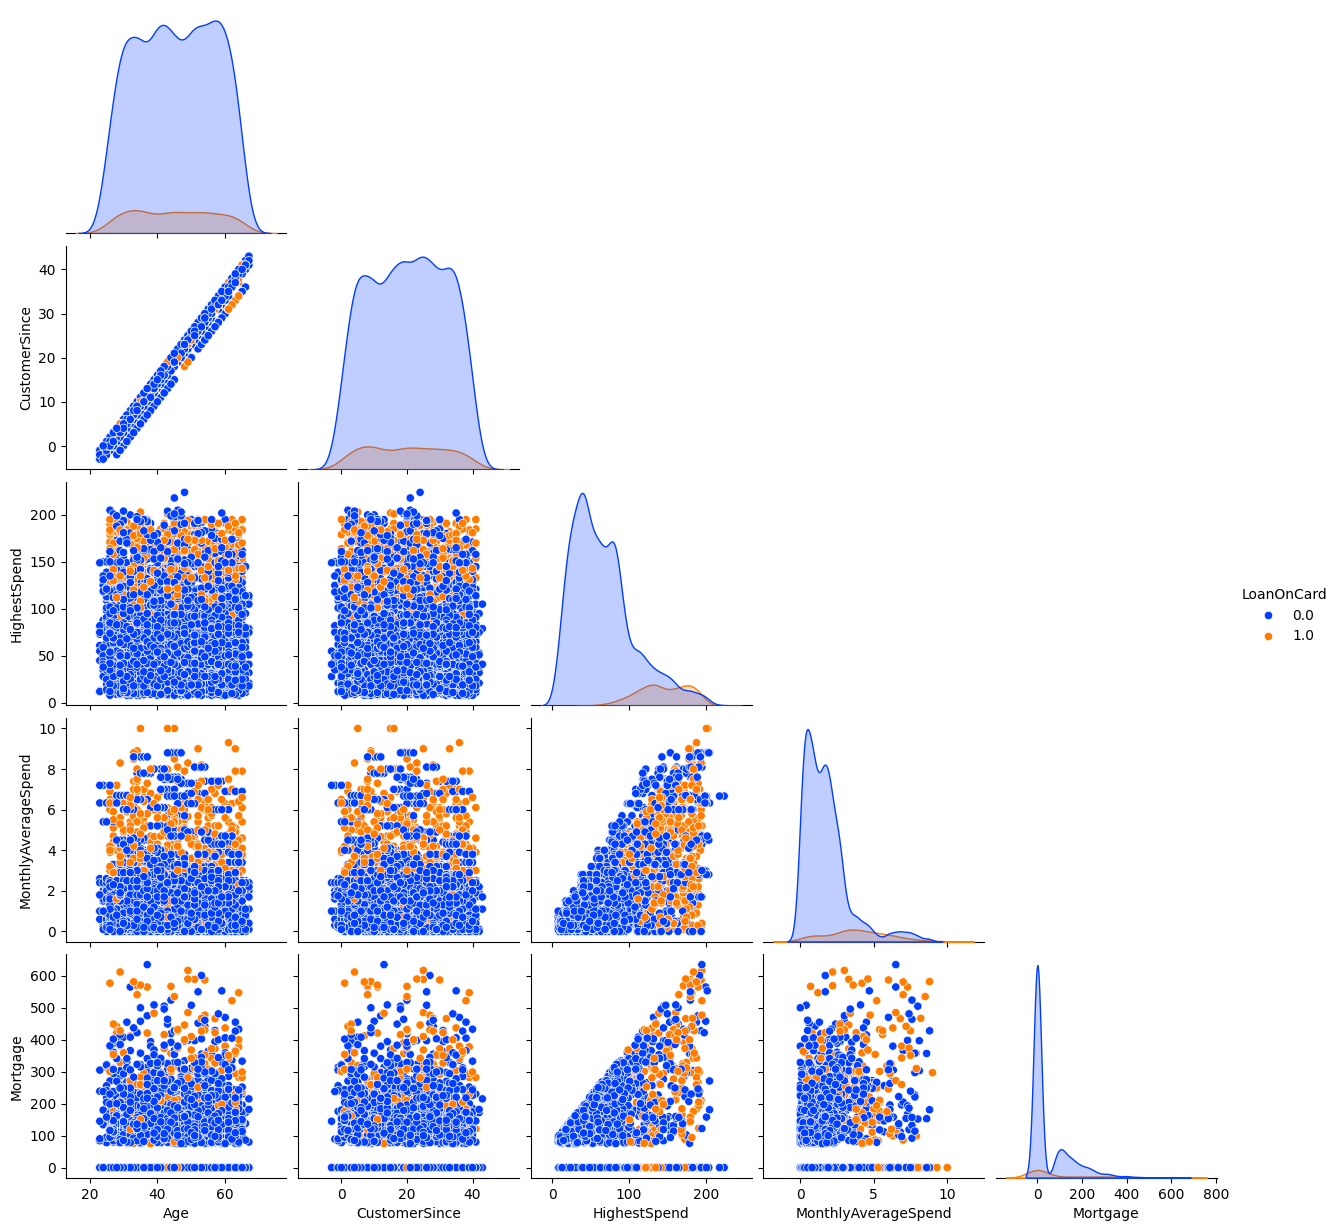

In [1197]:
plt.figure(figsize=(20,20))
sns.pairplot(data=data, corner=True, hue='LoanOnCard', palette= 'bright')             
plt.show           

<b>Observations:</b>

There is linear corelation between between age and customersince
There are number of customer who have not taken any mortgage

### Analyse the impact of categorical variables on Target Variable ('LoanOnCard').

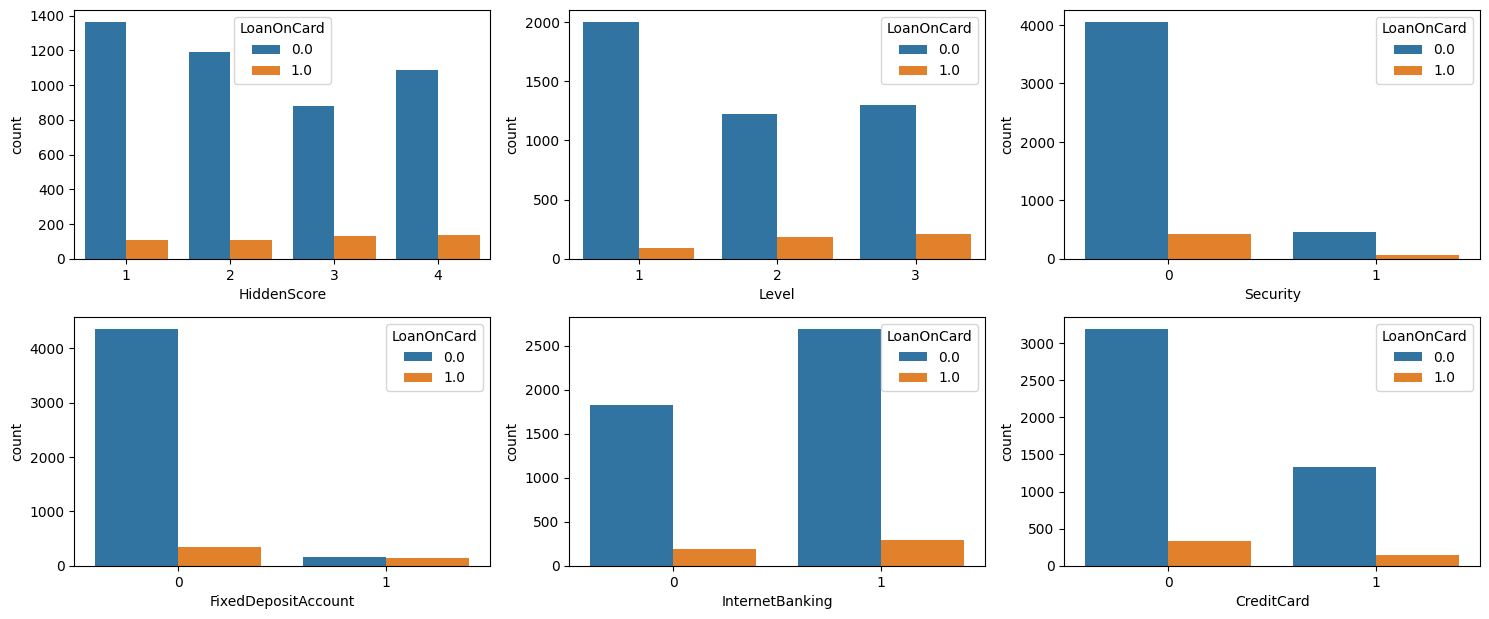

In [1198]:
categorical_datab = datab.select_dtypes(include=['category'])
num_rows=4
num_cols= 3
#fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,5))
#axes = axes.flatten()
 
 
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_datab.columns):
     #   ax = axes[i]
    plt.subplot(num_rows, num_cols, i+1)
    sns.countplot(datab, x=col,  hue='LoanOnCard')

# Hide empty subplots if there are any
#for i in range(len(categorical_datab.columns), len(axes)):
 #   axes[i].axis('off')

plt.tight_layout()
plt.show()

<b>Hidden Score</b> 
HiddenScore for non Loan holders is more than Loan holders and is the same across all the categories (~100)
For the Loan takers (it is greates for 1 then 2 then 4 and least for 3

HiddenScore of 1:
~1400 customer have not taken a loan
~100 have taken a loan 

HiddenScore of 2:
~1200 customer have not taken a loan
~100 have taken a loan 


HiddenScore of 3:
~800 customer have not taken a loan
~150 have taken a loan 

HiddenScore of 4:
~1000 customer have not taken a loan
~150 have taken a loan 

<b>Level</b> 
Level 1 is high for Loan Holders than as seen for Level 2 and 3.
Level 2 and 3 have the same number of customer taking and not taking the loan

For Customer with level 1:
~2000 customer have not taken a loan
~100 have taken a loan 

For Customer with level 2:
~1200 customer have not taken a loan
~300 have taken a loan 


For Customer with level 3:
~1200 customer have not taken a loan
~300 have taken a loan 

<b>Security</b> 

For Customer who do not have a security asset with the bank:
~4000 customer have not taken a loan
~200-300 have taken a loan 

For Customer who have a security asset with the bank:
~400 customer have not taken a loan
~50 have taken a loan 


<b>FixedDepositsAccount</b> 
Those having a fxed deposit however does not seem to have any impact on whether a person who take a loan on not 

For Customer who do not have a fixed deposit with the bank:
~4500 customer have not taken a loan
~200-300 have taken a loan 

For Customer who have a fixed deposit:
~100 customer have not taken a loan
~100 have taken a loan 


<b>InternetBanking</b> 
For Customer who do not use internet banking:
~1800 customer have not taken a loan
~100 have taken a loan 

For Customer who use internet banking:
~3000 customer have not taken a loan
~300 have taken a loan 

<b>CreditCard</b> 
Customer who use credit cards have taken 

For Customer who do not have a credit card:
3000 customer have not taken a loan
200-300 have taken a loan 

For Customer who use Credit Card(1470):
~1400 customer have not taken a loan
~100 have taken a loan 

Both Loan takers and non Loan takers both have very less customers with Credit card.


### 2. B. Check the percentage of missing values and impute if required. 

In [1227]:
data.isnull().sum()
# there are no nulls. 20 nulls in LoanOnCard were removed earlier

Age                    0
CustomerSince          0
HighestSpend           0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

### 2.C. Check for unexpected values in each categorical variable and impute with best suitable value. 

[Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment ]

In [1228]:
categoricalColumns= ['HiddenScore','Level','Security','FixedDepositAccount','InternetBanking','CreditCard']
for col in data[categoricalColumns]:
    print(col)
    print(data[col].unique())
    
#none of the categorical columns have any special characters

HiddenScore
[4, 3, 1, 2]
Categories (4, int64): [1, 2, 3, 4]
Level
[1, 2, 3]
Categories (3, int64): [1, 2, 3]
Security
[1, 0]
Categories (2, int64): [0, 1]
FixedDepositAccount
[0, 1]
Categories (2, int64): [0, 1]
InternetBanking
[0, 1]
Categories (2, int64): [0, 1]
CreditCard
[0, 1]
Categories (2, int64): [0, 1]


In [1229]:
datab.info()
#as all the numerical columns are correctly defined as Integers therefore they do not have any special characters

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  5000 non-null   int64   
 1   CustomerSince        5000 non-null   int64   
 2   HighestSpend         5000 non-null   int64   
 3   HiddenScore          5000 non-null   category
 4   MonthlyAverageSpend  5000 non-null   float64 
 5   Level                5000 non-null   category
 6   Mortgage             5000 non-null   int64   
 7   Security             5000 non-null   category
 8   FixedDepositAccount  5000 non-null   category
 9   InternetBanking      5000 non-null   category
 10  CreditCard           5000 non-null   category
 11  LoanOnCard           5000 non-null   float64 
dtypes: category(6), float64(2), int64(4)
memory usage: 303.5 KB


## 3. Data Preparation and model building:

Scaling the data 

In [1322]:
#Robust scaler has been used because there are a lot of outliers in all the features and therefore Standard and Min-Max scalars cannot be used
#columns to scale
categorical_datab = datab.select_dtypes(include=['category'])
numeric_datab = ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage' ]

robustScaler1 = RobustScaler()
#scaling using robust scaler
roubustScaledOutput_b = pd.DataFrame(robustScaler1.fit_transform(datab[numeric_datab]),columns=numeric_datab,index=datab.index)
roubustScaledOutput_b.head()


,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage
0,-1.0,-0.95,-0.254237,0.055556,0.0
1,0.0,-0.05,-0.508475,0.000000,0.0
2,-0.3,-0.25,-0.898305,-0.277778,0.0
3,-0.5,-0.55,0.610169,0.666667,0.0
4,-0.5,-0.60,-0.322034,-0.277778,0.0


In [1328]:
#merging back the class columns with scaled data
dfScaledRobust_b=pd.concat([roubustScaledOutput_b,datab[categorical_datab.columns], datab["LoanOnCard"]],axis=1)
dfScaledRobust_b.head()                                              

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage,HiddenScore,Level,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,-1.0,-0.95,-0.254237,0.055556,0.0,4,1,1,0,0,0,0.0
1,0.0,-0.05,-0.508475,0.000000,0.0,3,1,1,0,0,0,0.0
2,-0.3,-0.25,-0.898305,-0.277778,0.0,1,1,0,0,0,0,0.0
3,-0.5,-0.55,0.610169,0.666667,0.0,1,2,0,0,0,0,0.0
4,-0.5,-0.60,-0.322034,-0.277778,0.0,4,2,0,0,0,1,0.0


In [1329]:
# Use label encoder to convert the target categorical variables to one-hot encoding 
class_label_encoder = LabelEncoder()

dfScaledRobust_b['LoanOnCard']= class_label_encoder.fit_transform(dfScaledRobust_b['LoanOnCard'])

In [1330]:
dfScaledRobust_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  5000 non-null   float64 
 1   CustomerSince        5000 non-null   float64 
 2   HighestSpend         5000 non-null   float64 
 3   MonthlyAverageSpend  5000 non-null   float64 
 4   Mortgage             5000 non-null   float64 
 5   HiddenScore          5000 non-null   category
 6   Level                5000 non-null   category
 7   Security             5000 non-null   category
 8   FixedDepositAccount  5000 non-null   category
 9   InternetBanking      5000 non-null   category
 10  CreditCard           5000 non-null   category
 11  LoanOnCard           5000 non-null   int64   
dtypes: category(6), float64(5), int64(1)
memory usage: 303.5 KB


In [1331]:
#get dummies for category columns
dfScaledRobust_b = pd.get_dummies(dfScaledRobust_b, drop_first = True)
dfScaledRobust_b.head()

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage,LoanOnCard,HiddenScore_2,HiddenScore_3,HiddenScore_4,Level_2,Level_3,Security_1,FixedDepositAccount_1,InternetBanking_1,CreditCard_1
0,-1.0,-0.95,-0.254237,0.055556,0.0,0,0,0,1,0,0,1,0,0,0
1,0.0,-0.05,-0.508475,0.000000,0.0,0,0,1,0,0,0,1,0,0,0
2,-0.3,-0.25,-0.898305,-0.277778,0.0,0,0,0,0,0,0,0,0,0,0
3,-0.5,-0.55,0.610169,0.666667,0.0,0,0,0,0,1,0,0,0,0,0
4,-0.5,-0.60,-0.322034,-0.277778,0.0,0,0,0,1,1,0,0,0,0,1


### Performing encoding for all the categorical columns

### 3. A. Split data into X and Y. 
[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]

In [1332]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# id and ZipCode columns were dropped earlier
Xb = dfScaledRobust_b.drop(labels= "LoanOnCard" , axis = 1)
yb = dfScaledRobust_b["LoanOnCard"]
Xb.head()

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage,HiddenScore_2,HiddenScore_3,HiddenScore_4,Level_2,Level_3,Security_1,FixedDepositAccount_1,InternetBanking_1,CreditCard_1
0,-1.0,-0.95,-0.254237,0.055556,0.0,0,0,1,0,0,1,0,0,0
1,0.0,-0.05,-0.508475,0.000000,0.0,0,1,0,0,0,1,0,0,0
2,-0.3,-0.25,-0.898305,-0.277778,0.0,0,0,0,0,0,0,0,0,0
3,-0.5,-0.55,0.610169,0.666667,0.0,0,0,0,1,0,0,0,0,0
4,-0.5,-0.60,-0.322034,-0.277778,0.0,0,0,1,1,0,0,0,0,1


### 3.B. Split data into train and test. Keep 25% data reserved for testing. 

In [1333]:
# Split X and y into training and test set in 75:25 ratio
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.25, random_state=1)

### 3.C. Train a Supervised Learning Classification base model - Logistic Regression.

In [1334]:
model = LogisticRegression(solver='liblinear')
model.fit(Xb_train,yb_train)

yb_predict = model.predict(Xb_test)

yb_prediction_train = model.predict(Xb_train)

TestScore = model.score(Xb_test,yb_test)

TrainScore = model.score(Xb_train,yb_train)
print('The accuracy of Logistic Regression on Test data:',TestScore)
print('The accuracy of Logistic Regression on Train Data :',TrainScore)

The accuracy of Logistic Regression on Test data: 0.9528
The accuracy of Logistic Regression on Train Data : 0.9608


### 3.D. Print evaluation metrics for the model and clearly share insights.

In [1352]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc

# Print the performance metrics
print(f"Accuracy: { accuracy_score(yb_test, yb_predict):.4f}")
print(f"Precision: {precision_score(yb_test, yb_predict,average='weighted'):.4f}")
print(f"Recall: {recall_score(yb_test, yb_predict,average='weighted'):.4f}")
print(f"F1 Score: {f1_score(yb_test, yb_predict,average='weighted'):.4f}")
print("ROC AUC Score:",  roc_auc_score(yb_test, yb_predict))

Accuracy: 0.9528
Precision: 0.9509
Recall: 0.9528
F1 Score: 0.9488
ROC AUC Score: 0.8021872774170349


The Confusion Matrix :
 [[1112    9]
 [  50   79]]


Text(0.5, 25.581597222222214, 'Actual label')

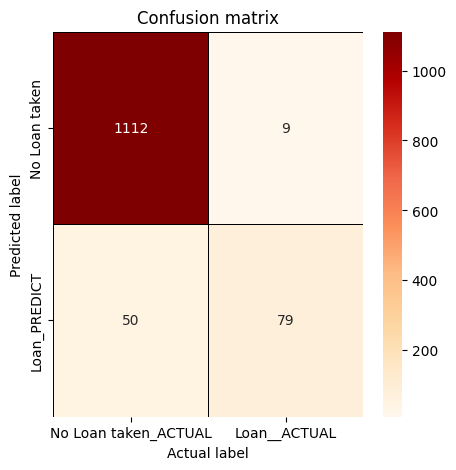

In [1336]:
#computing Confusion Matrix
from sklearn import metrics

cm = metrics.confusion_matrix(yb_test,yb_predict)
print('The Confusion Matrix :\n',cm)
 
colormap = plt.cm.OrRd
plt.figure(figsize=(5,5))
sns.heatmap(cm, xticklabels=['No Loan taken_ACTUAL', 'Loan__ACTUAL'],yticklabels= ['No Loan taken', 'Loan_PREDICT'], cmap=colormap, linecolor='black', linewidths =0.5,annot=True, fmt='g')

plt.title('Confusion matrix')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

From the confusion matrix we can see the below:

True Positive (TP) : The model correctly predicted 79 customers have taken loans when the loans were actualy taken 

True Negative (TN): The model predicted 1112 have not taken loans and loans were actually not taken 

False Positive (FP): The model predicted 50 have taken loans but the loans was not taken

False Negative (FN): The model predicted 9 have not taken loans but loan was actually taken 

Model has high % of failure in identifying customers who had taken Loans. This is because the data is highly imbalance and the model is biased to Non Loan Takers.

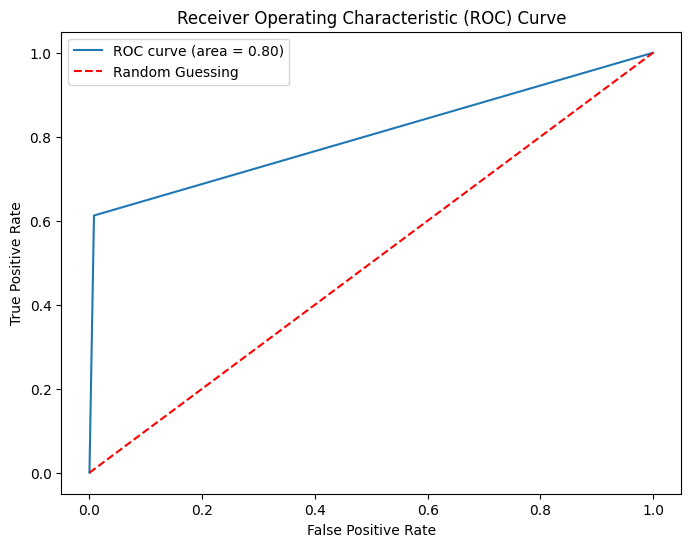

In [1353]:

# ROC curve
fpr, tpr, thresholds = roc_curve(yb_test, yb_predict)
roc_auc_curve = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_curve:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [1337]:
print('The Classification report on train data : \n', classification_report(yb_train,yb_prediction_train))

The Classification report on train data : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      3399
           1       0.90      0.66      0.76       351

    accuracy                           0.96      3750
   macro avg       0.93      0.83      0.87      3750
weighted avg       0.96      0.96      0.96      3750



In [1338]:
print('The Classification report of test data : \n', classification_report(yb_test,yb_predict))     

The Classification report of test data : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1121
           1       0.90      0.61      0.73       129

    accuracy                           0.95      1250
   macro avg       0.93      0.80      0.85      1250
weighted avg       0.95      0.95      0.95      1250



### 3E. Balance the data using the right balancing technique.
      i. Check distribution of the target variable
      ii. Say output is class A : 20% and class B : 80%
      iii. Here you need to balance the target variable as 50:50.
      iv. Try appropriate method to achieve the same.

In [1339]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTETomek


# import library for balancing the data using oversampling.

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_sm, y_sm = smote.fit_resample(Xb, yb) # Fit the data for sampling

In [1340]:
X_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9040 entries, 0 to 9039
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    9040 non-null   float64
 1   CustomerSince          9040 non-null   float64
 2   HighestSpend           9040 non-null   float64
 3   MonthlyAverageSpend    9040 non-null   float64
 4   Mortgage               9040 non-null   float64
 5   HiddenScore_2          9040 non-null   uint8  
 6   HiddenScore_3          9040 non-null   uint8  
 7   HiddenScore_4          9040 non-null   uint8  
 8   Level_2                9040 non-null   uint8  
 9   Level_3                9040 non-null   uint8  
 10  Security_1             9040 non-null   uint8  
 11  FixedDepositAccount_1  9040 non-null   uint8  
 12  InternetBanking_1      9040 non-null   uint8  
 13  CreditCard_1           9040 non-null   uint8  
dtypes: float64(5), uint8(9)
memory usage: 432.7 KB


In [1341]:
pd.DataFrame(y_sm)['LoanOnCard'].value_counts()
# now we have equal number of LoanOnCard distribution between loan takers and loan non takers

0    4520
1    4520
Name: LoanOnCard, dtype: int64

### 3F. Again train the same previous model on balanced data. 

In [1348]:
# Split X and y into training and test set in 75:25 ratio
Xbm_train, Xbm_test, ybm_train, ybm_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=1)
model = LogisticRegression(solver='liblinear')
model.fit(Xbm_train,ybm_train)

ybm_predict_test = model.predict(Xbm_test)

ybm_predict_train = model.predict(Xbm_train)

Accuracy: 0.9022
Precision: 0.9022
Recall: 0.9022
F1 Score: 0.9022


### 3G. Print evaluation metrics and clearly share differences observed.

In [1354]:
# Print the performance metrics
print(f"Accuracy: { accuracy_score(ybm_test, ybm_predict_test):.4f}")
print(f"Precision: {precision_score(ybm_test, ybm_predict_test,average='weighted'):.4f}")
print(f"Recall: {recall_score(ybm_test, ybm_predict_test,average='weighted'):.4f}")
print(f"F1 Score: {f1_score(ybm_test, ybm_predict_test,average='weighted'):.4f}")
print("ROC AUC Score:",  roc_auc_score(ybm_test, ybm_predict_test))

Accuracy: 0.9022
Precision: 0.9022
Recall: 0.9022
F1 Score: 0.9022
ROC AUC Score: 0.9021238497184807


The Confusion Matrix :
 [[ 998  116]
 [ 105 1041]]


Text(0.5, 47.5815972222222, 'Actual label')

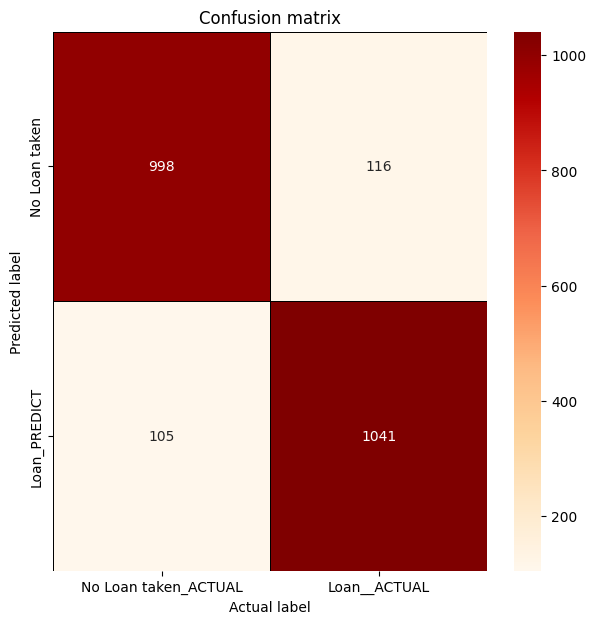

In [1343]:

cm = metrics.confusion_matrix(ybm_test,ybm_predict_test)
print('The Confusion Matrix :\n',cm)
 
colormap = plt.cm.OrRd
plt.figure(figsize=(7,7))
sns.heatmap(cm, xticklabels=['No Loan taken_ACTUAL', 'Loan__ACTUAL'],yticklabels= ['No Loan taken', 'Loan_PREDICT'], cmap=colormap, linecolor='black', linewidths =0.5,annot=True, fmt='g')

plt.title('Confusion matrix')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')


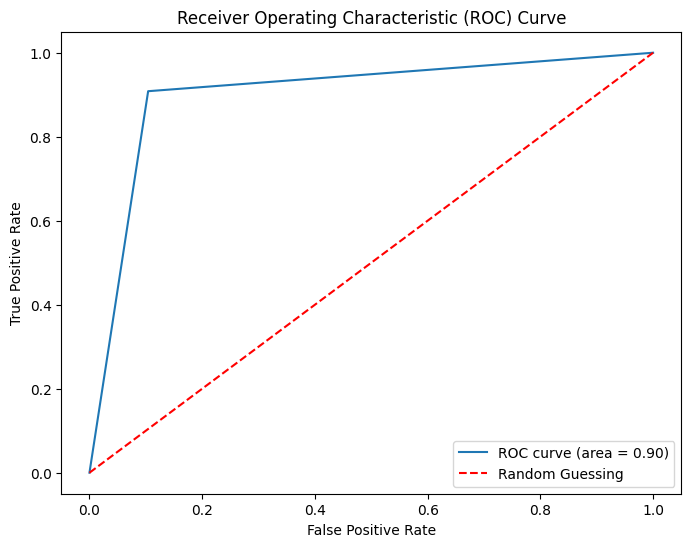

In [1355]:
# ROC curve
fpr, tpr, thresholds = roc_curve(ybm_test, ybm_predict_test)
roc_auc_curve = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_curve:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [1344]:
print('The Classification report for train data after rebalancing the data : \n', classification_report(ybm_train,ybm_predict_train))  


The Classification report for train data after rebalancing the data : 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      3406
           1       0.90      0.91      0.90      3374

    accuracy                           0.90      6780
   macro avg       0.90      0.90      0.90      6780
weighted avg       0.90      0.90      0.90      6780



In [1345]:
print('The Classification report for test data after rebalancing the data : \n', classification_report(ybm_test,ybm_predict_test))  


The Classification report for test data after rebalancing the data : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1114
           1       0.90      0.91      0.90      1146

    accuracy                           0.90      2260
   macro avg       0.90      0.90      0.90      2260
weighted avg       0.90      0.90      0.90      2260



After rebalancing the data all the metrics are not giving equal performance for both identifying loan takers and no loan takers on both training and test data sets

<b style="color:blue">On Train dataset</b>
for correctly identifying loan takers
1. Precision increased from 0.90 to .90
2. recall increased from 0.66 to 0.91
3. f-score increased from 0.76 to 0.90
                
<b style="color:blue">On Test dataset</b>
for correctly identifying loan takers
1. Precision has remained the same for 
2. recall increased from 0.61 to 0.91
3. f-score increased from 0.73 to 0.90


## 4 Performance Improvement:

### 4A. Train a base model each for SVM, KNN.

#### KNN 

In [1356]:
#Using the default value of K (5)
KNN_B = KNeighborsClassifier()
#Xbm_train, Xbm_test, ybm_train, ybm_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=1)
KNN_B.fit(Xbm_train, ybm_train)
y_pred_KNN = KNN_B.predict(Xbm_test)

Accuracy: 0.9655
Precision: 0.9662
Recall: 0.9655
F1 Score: 0.9655
------------------
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1114
           1       0.95      0.99      0.97      1146

    accuracy                           0.97      2260
   macro avg       0.97      0.97      0.97      2260
weighted avg       0.97      0.97      0.97      2260



In [1358]:
KNN_B.score(Xbm_test, ybm_test)

# Print the performance metrics
print(f"Accuracy: { accuracy_score(ybm_test, y_pred_KNN):.4f}")
print(f"Precision: {precision_score(ybm_test, y_pred_KNN,average='weighted'):.4f}")
print(f"Recall: {recall_score(ybm_test, y_pred_KNN,average='weighted'):.4f}")
print(f"F1 Score: {f1_score(ybm_test, y_pred_KNN,average='weighted'):.4f}")
print("ROC AUC Score:",  roc_auc_score(ybm_test, y_pred_KNN))
print('------------------')
print(classification_report(ybm_test, y_pred_KNN))


Accuracy: 0.9655
Precision: 0.9662
Recall: 0.9655
F1 Score: 0.9655
ROC AUC Score: 0.9651915490927777
------------------
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1114
           1       0.95      0.99      0.97      1146

    accuracy                           0.97      2260
   macro avg       0.97      0.97      0.97      2260
weighted avg       0.97      0.97      0.97      2260



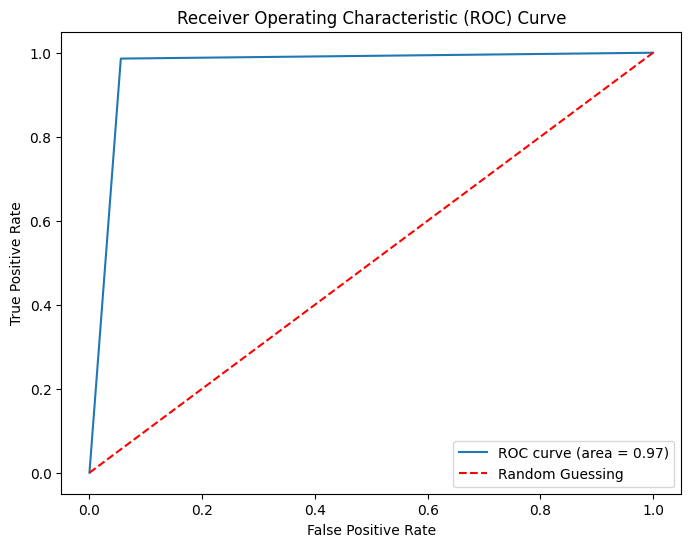

In [1357]:
# ROC curve
fpr, tpr, thresholds = roc_curve(ybm_test, y_pred_KNN)
roc_auc_curve = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_curve:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### SVM

In [1359]:
from sklearn import svm

In [1360]:
clf = svm.SVC(gamma=0.025, C=3)  
clf.fit(Xbm_train , ybm_train)
y_pred_test_SVM = clf.predict(Xbm_test)

In [1363]:
# Print the performance metrics
print(f"Accuracy: { accuracy_score(ybm_test, y_pred_test_SVM):.4f}")
print(f"Precision: {precision_score(ybm_test, y_pred_test_SVM,average='weighted'):.4f}")
print(f"Recall: {recall_score(ybm_test, y_pred_test_SVM,average='weighted'):.4f}")
print(f"F1 Score: {f1_score(ybm_test, y_pred_test_SVM,average='weighted'):.4f}")
print("ROC AUC Score:",  roc_auc_score(ybm_test, y_pred_test_SVM))
print('------------------')
print(classification_report(ybm_test, y_pred_test_SVM))


Accuracy: 0.9354
Precision: 0.9354
Recall: 0.9354
F1 Score: 0.9354
ROC AUC Score: 0.9353100786123618
------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1114
           1       0.93      0.94      0.94      1146

    accuracy                           0.94      2260
   macro avg       0.94      0.94      0.94      2260
weighted avg       0.94      0.94      0.94      2260



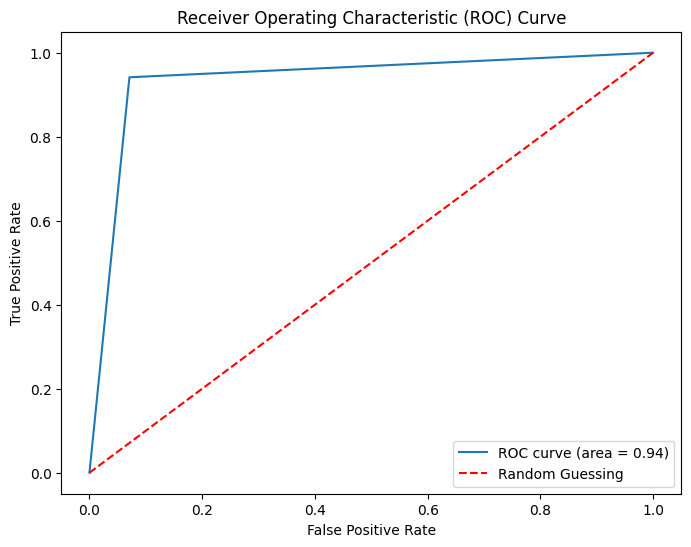

In [1362]:
# ROC curve
fpr, tpr, thresholds = roc_curve(ybm_test, y_pred_test_SVM)
roc_auc_curve = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_curve:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### B. Tune parameters for each of the models wherever required and finalize a model. [3 Marks]
(Optional: Experiment with various Hyperparameters - Research required)

#### Tuning for KNN

In [1374]:
# creating odd list of K for KNN
myList_b = list(range(1,30))

# subsetting just the odd ones
neighbors_b = list(filter(lambda x: x % 2 != 0, myList_b))

In [1375]:
from sklearn.model_selection import GridSearchCV 
#from sklearn.model_selection import RandomizedSearchCV

estimator_KNN_b = KNeighborsClassifier()
parameters_KNN_b = {
    'n_neighbors': neighbors_b, #[1, 3, 5, 7, 8, 9, 11, 13, 15,17,19,21],#,23,25,27, 29,31,33,35,37,39,41,43, 45,47, 49, 51],
    'leaf_size': [20,30,40,50],
    'p': [1,2],
    'weights': ('uniform', 'distance'),
    'metric': ('euclidean', 'minkowski', 'chebyshev'),
    'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')
}
grid_search_KNN_b = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

grid_search_KNN_b.fit(Xbm_train, ybm_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': [20, 30, 40, 50],
                         'metric': ('euclidean', 'minkowski', 'chebyshev'),
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2], 'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [1376]:
print(grid_search_KNN_b.best_params_ ) 
#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', grid_search_KNN_b.best_score_ )

# Predict using the best model
best_model_KNN = GridSearchCV.best_estimator_
y_pred_KNN_1 = best_model_KNN.predict(Xbm_test)
 
print('\n---------------------------------------\n')
# Print the performance metrics
print(f"Accuracy: {accuracy_score(ybm_test, y_pred_KNN_1):.4f}")
print(f"Precision: {precision_score(ybm_test, y_pred_KNN_1,average='weighted'):.4f}")
print(f"Recall: { recall_score(ybm_test, y_pred_KNN_1,average='weighted'):.4f}")
print(f"F1 Score: {f1_score(ybm_test, y_pred_KNN_1,average='weighted'):.4f}")

print('------------------')
print(classification_report(ybm_test, y_pred_KNN_1))

{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best Score - KNN: 0.9797935103244839

---------------------------------------

Accuracy: 0.9832
Precision: 0.9834
Recall: 0.9832
F1 Score: 0.9832
------------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1114
           1       0.97      0.99      0.98      1146

    accuracy                           0.98      2260
   macro avg       0.98      0.98      0.98      2260
weighted avg       0.98      0.98      0.98      2260



In [1391]:
from sklearn.model_selection import GridSearchCV 
#from sklearn.model_selection import RandomizedSearchCV

estimator_KNN_b_random = KNeighborsClassifier()
parameters_KNN_b_randome = {
    'n_neighbors': neighbors_b, #[1, 3, 5, 7, 8, 9, 11, 13, 15,17,19,21],#,23,25,27, 29,31,33,35,37,39,41,43, 45,47, 49, 51],
    'leaf_size': [20,30,40,50],
    'p': [1,2],
    'weights': ('uniform', 'distance'),
    'metric': ('euclidean', 'minkowski', 'chebyshev'),
    'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')
}
random_search_KNN_b = RandomizedSearchCV(
    estimator=estimator_KNN,
    param_distributions=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5,
    random_state=42
)

random_search_KNN_b.fit(Xbm_train, ybm_train)



RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ('auto', 'ball_tree',
                                                      'kd_tree', 'brute'),
                                        'leaf_size': [20, 30, 40, 50],
                                        'metric': ('euclidean', 'minkowski',
                                                   'chebyshev'),
                                        'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19],
                                        'p': [1, 2],
                                        'weights': ('uniform', 'distance')},
                   random_state=42, scoring='accuracy')

In [1392]:
print(random_search_KNN_b.best_params_ ) 
#Mean cross-validated score of the best_estimator
print('Best Score - KNN RandomisedSearchCV:', random_search_KNN_b.best_score_ )

# Predict using the best model
best_model_KNN_random = random_search_KNN_b.best_estimator_
y_pred_KNN_1_random = best_model_KNN_random.predict(Xbm_test)
 
print('\n---------------------------------------\n')
# Print the performance metrics
print(f"Accuracy: {accuracy_score(ybm_test, y_pred_KNN_1_random):.4f}")
print(f"Precision: {precision_score(ybm_test, y_pred_KNN_1_random,average='weighted'):.4f}")
print(f"Recall: { recall_score(ybm_test, y_pred_KNN_1_random,average='weighted'):.4f}")
print(f"F1 Score: {f1_score(ybm_test, y_pred_KNN_1_random,average='weighted'):.4f}")

print('------------------')
print(classification_report(ybm_test, y_pred_KNN_1_random))

{'weights': 'distance', 'p': 1, 'n_neighbors': 1, 'metric': 'euclidean', 'leaf_size': 30, 'algorithm': 'auto'}
Best Score - KNN RandomisedSearchCV: 0.976401179941003

---------------------------------------

Accuracy: 0.9819
Precision: 0.9821
Recall: 0.9819
F1 Score: 0.9819
------------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1114
           1       0.97      0.99      0.98      1146

    accuracy                           0.98      2260
   macro avg       0.98      0.98      0.98      2260
weighted avg       0.98      0.98      0.98      2260



In [1389]:
 
# Define the parameter grid to search through
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Create the SVM classifier
svm_1 = svm.SVC()

# Create GridSearchCV
grid_search = RandomizedSearchCV(svm_1, param_grid, cv=5, scoring='accuracy')

# Fit the model using GridSearchCV
grid_search.fit(Xbm_train, ybm_train)


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   scoring='accuracy')

In [1390]:
print(grid_search.best_params_ ) 
#Mean cross-validated score of the best_estimator
print('Best Score - SVC:', grid_search.best_score_ )

# Predict using the best model
best_model_SVM = grid_search.best_estimator_
y_pred_SVM_1 = grid_search.predict(Xbm_test)
 
print('\n---------------------------------------\n')
# Print the performance metrics
print(f"Accuracy: {accuracy_score(ybm_test, y_pred_SVM_1):.4f}")
print(f"Precision: {precision_score(ybm_test, y_pred_SVM_1,average='weighted'):.4f}")
print(f"Recall: { recall_score(ybm_test, y_pred_SVM_1,average='weighted'):.4f}")
print(f"F1 Score: {f1_score(ybm_test, y_pred_SVM_1,average='weighted'):.4f}")

print('------------------')
print(classification_report(ybm_test, y_pred_SVM_1))

{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}
Best Score - SVC: 0.9529498525073746

---------------------------------------

Accuracy: 0.9522
Precision: 0.9523
Recall: 0.9522
F1 Score: 0.9522
------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1114
           1       0.96      0.95      0.95      1146

    accuracy                           0.95      2260
   macro avg       0.95      0.95      0.95      2260
weighted avg       0.95      0.95      0.95      2260



### C. Print evaluation metrics for final model. 

<b>Observation</b>
KNN model with below hyperparamters is giving the best results
{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best Score - KNN: 0.9797935103244839

In [1381]:
# Print the performance metrics

print(f"Accuracy: { accuracy_score(ybm_test, y_pred_KNN_1):.4f}")
print(f"Precision: {precision_score(ybm_test, y_pred_KNN_1,average='weighted'):.4f}")
print(f"Recall: {recall_score(ybm_test, y_pred_KNN_1,average='weighted'):.4f}")
print(f"F1 Score: {f1_score(ybm_test, y_pred_KNN_1,average='weighted'):.4f}")
print("ROC AUC Score:",  roc_auc_score(ybm_test, y_pred_KNN_1))
print('------------------')
print(classification_report(ybm_test, y_pred_KNN_1))

Accuracy: 0.9832
Precision: 0.9834
Recall: 0.9832
F1 Score: 0.9832
ROC AUC Score: 0.9830446075805002
------------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1114
           1       0.97      0.99      0.98      1146

    accuracy                           0.98      2260
   macro avg       0.98      0.98      0.98      2260
weighted avg       0.98      0.98      0.98      2260



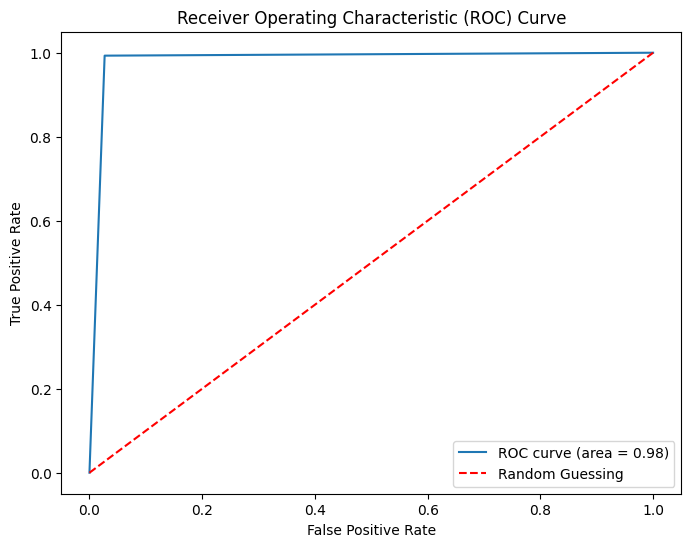

In [1382]:

# ROC curve
fpr, tpr, thresholds = roc_curve(ybm_test, y_pred_KNN_1)
roc_auc_curve = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_curve:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### D. Share improvement achieved from base model to final model.

In [1379]:
#before
#Accuracy: 0.9655
#Precision: 0.9662
#Recall: 0.9655
#F1 Score: 0.9655
#ROC AUC Score: 0.9651915490927777

#after
#Accuracy: 0.9832
#Precision: 0.9834
#Recall: 0.9832
#F1 Score: 0.9832

#Improvemet in Accuracy 
print(f'{percentage(0.9832-0.9655, 0.9655):.4f}% improvement in accuracy')
print(f'{percentage(0.9834-0.9662, 0.9662):.4f}% improvement in Precision')
print(f'{percentage(0.9832-0.9655, 0.9655):.4f}% improvement in Recall')
print(f'{percentage(0.9832-0.9655, 0.9655):.4f}% improvement in F1 Score')

1.8332% improvement in accuracy
1.7802% improvement in Precision
1.8332% improvement in Recall
1.8332% improvement in F1 Score


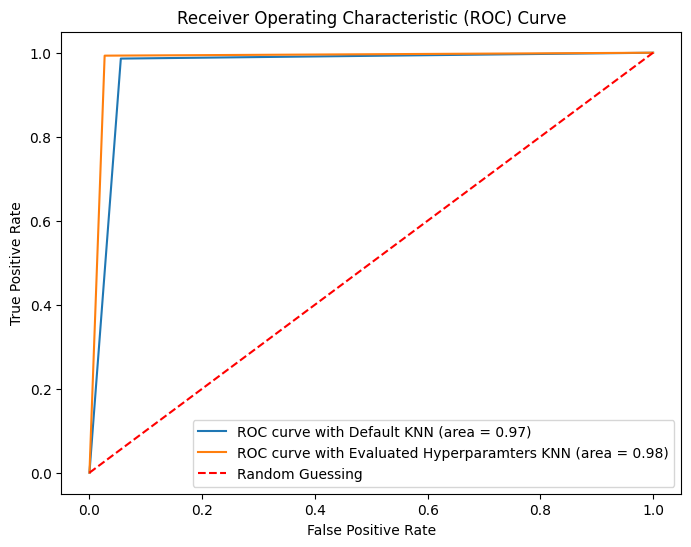

In [1387]:

# ROC curve
fpr, tpr, thresholds = roc_curve(ybm_test, y_pred_KNN)
fpr1, tpr1, thresholds1 = roc_curve(ybm_test, y_pred_KNN_1)
roc_auc_curve = auc(fpr, tpr)
roc_auc_curve_1 = auc(fpr1, tpr1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve with Default KNN (area = {roc_auc_curve:.2f})')
plt.plot(fpr1, tpr1, label=f'ROC curve with Evaluated Hyperparamters KNN (area = {roc_auc_curve_1:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()